# What car should I buy? 

## Introduction and aims 

This project is going to use a dataset downloaded from Kaggle (https://www.kaggle.com/CooperUnion/cardataset) that contains features of cars. The dataset was origianlly scraped from Edmunds and Twitter to determine which car features predict price. Thanks goes to Kaggle user CooperUnion for making this datset available.  

I want to use this data to do design a small series of questions to search for a car of interest. 

## Step 1 - import packages 

In [1]:
# import the packages required for the analysis 
import numpy as np                # for data wrangling 
import pandas as pd               # for data wrangling
import matplotlib.pyplot as plt   # for plotting
import seaborn as sns             # for plotting


## Step 2 - import data

In [2]:
# import the .csv dataset using the pandas read.csv() function 
# call the dataset "car_raw_data"
car_raw_data = pd.read_csv("/Users/hillvk/desktop/kaggle_car_data2.csv", 
                            delimiter = ",", 
                            index_col=False)     # tell pandas to not use the first row as row names

### Take a look at the data...

- Want to have a brief look at the data to make sure it looks like it has been imported correctly 

#### head( ) command 

In [3]:
# take a look at the first 10 rows to make sure the data has been imported correctly 
car_raw_data.head(n=10)

,make,model,year,engine_fuel_type,engine_HP,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


- The data looks like it imported correctly 
- Now have a look at how much data is in the datset 

#### shape( ) command 

In [4]:
# use the shape() command to find out how many rows and columns the data has 
print(car_raw_data.shape)

(11914, 16)


- This is a large dataset containing data on 16 different features for 11914 different cars 

#### Are there any null values? 

In [5]:
# ask if there are any null values within the imported dataset 
# return a boolean 
print(car_raw_data.isnull().values.any())

True


- There are some null values, remove from the dataset 
- Once they have been removed, have a look to see how many datapoints remain

In [6]:
# create a new variable, "car_mod_data", that has had all rows containing a null value removed 
car_mod_data = car_raw_data.dropna(axis=0, how='any') 

# dropna() will remove na values 
# the argument axis=0 means to remove rows based on na values 
# the argument "how='any'" means remove any row that has a null value in any of the columns 

- How many rows and columns remain now that the null values have been removed? 

In [7]:
# use the shape() command to find out how many rows and columns the modified data has 
print(car_mod_data.shape)

(8084, 16)


- This is still a very large dataset, go forward and use the filtered data for further analyses 

## Step 3 - get some idea of what information is in the dataset 

### What car makes are included in the data? 

In [8]:
# have a look at the unique entries in the 'make' column 
print(car_mod_data.make.unique())

['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'McLaren' 'Maybach' 'Porsche' 'Toyota'
 'Saab' 'GMC' 'Hyundai' 'Honda' 'Cadillac' 'Bentley' 'Ford' 'Oldsmobile'
 'Chevrolet' 'Dodge' 'Lamborghini' 'Lincoln' 'Pontiac' 'Subaru'
 'Volkswagen' 'Spyker' 'Kia' 'Acura' 'Plymouth' 'Rolls-Royce' 'Maserati'
 'Lexus' 'Aston Martin' 'Land Rover' 'Lotus' 'Buick' 'Infiniti' 'Scion'
 'Genesis' 'Suzuki' 'HUMMER' 'Bugatti']


### How many car makes are included in the data? 

- How many car makes are included in the dataset? 
- Do the car makes have similar numbers of models within the dataset? 

In [9]:
# how many different makes of car are in the dataset? 
# print out the number of unique entries in the 'make' column 
print(car_mod_data.make.nunique())

47


In [10]:
# count how many of each make are in the dataset 
# first group the data by 'make' and then use count() to count the models in each group 
# use as_index=False option so that column containing the car makes will not become indexes  
make_count = car_mod_data.groupby('make', as_index=False)['model'].count()

# sort the data into descending order on the number of models per make 
sorted_make_count = make_count.sort_values(by=['model'], ascending=[False])

### sanity check - print the new varaible, 'make_count' 
print(sorted_make_count)

             make  model
9       Chevrolet    614
45     Volkswagen    581
14           Ford    492
8        Cadillac    397
31  Mercedes-Benz    352
4             BMW    334
20       Infiniti    330
3            Audi    328
11          Dodge    320
33         Nissan    308
44         Toyota    300
18          Honda    282
46          Volvo    281
15            GMC    270
0           Acura    252
29          Mazda    239
42         Subaru    214
19        Hyundai    214
24          Lexus    202
25        Lincoln    156
23     Land Rover    143
37        Porsche    136
32     Mitsubishi    125
7           Buick    125
39           Saab    111
21            Kia    109
10       Chrysler    108
43         Suzuki     99
2    Aston Martin     93
36        Pontiac     77
5         Bentley     74
13        Ferrari     68
27       Maserati     58
22    Lamborghini     52
40          Scion     48
35       Plymouth     39
12           FIAT     38
38    Rolls-Royce     31
26          Lotus     29


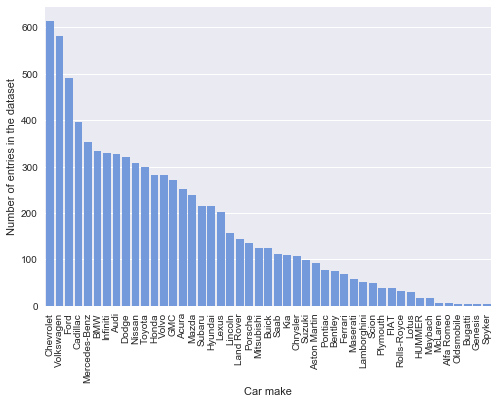

In [11]:
# draw a bar chart of the data to get an easier and quicker indication of this data
# choose a single color as the default of multiple colors will not be approriate here 
model_chart = sns.barplot(x="make", y="model", data=sorted_make_count, color='cornflowerblue') 

# set the x and y labels 
# becasue there are so many bars, set the x axis tick labes to be at 90 degrees so that they are readable 
model_chart.set(xlabel='Car make', ylabel = 'Number of entries in the dataset')
for item in model_chart.get_xticklabels():
    item.set_rotation(90)
plt.show()

- Chevrolet and Volkswagon are the most common car makes in the dataset 
- This may be because there are multiple entries per model (e.g. all Chevrolet models might be available with many different options (e.g. automatic transmission, manual transmission, all wheel drive, rear wheel drive etc.) or it maybe becuase some car makes produce a wider range of vehicles 

### What different car types are within the dataset? How may different types? 

- I would like to know what the dataset has in terms of sedans, SUVs, hatchbacks etc. 

In [12]:
# pull out the unique entries in the 'vehicle_style' column 
print(car_mod_data.vehicle_style.unique())

['Coupe' 'Convertible' 'Sedan' 'Wagon' '4dr Hatchback' '2dr Hatchback'
 '4dr SUV' 'Crew Cab Pickup' 'Extended Cab Pickup' 'Regular Cab Pickup'
 'Passenger Minivan' 'Cargo Minivan' '2dr SUV' 'Convertible SUV'
 'Cargo Van' 'Passenger Van']


In [13]:
# how many different vehicle styles are in the dataset?
# print out the number of unique entries are in the 'vehicle_style' column 
print(car_mod_data.vehicle_style.nunique())

16


In [14]:
# count how many of each vehicle style are in the dataset 
# first group the data by 'vehicle_style' and then use count() to count the models in each group 
# use 'as_index=False' argument so that the column containing the different vehicle styles will not become indexes 
vehicle_style_count = car_mod_data.groupby('vehicle_style', as_index=False)['model'].count()

# sort the data into descending order on the number of models per vehicle style
sorted_style_count = vehicle_style_count.sort_values(by=['model'], ascending=[False])

### sanity check - print the new varaible, 'sorted_style_count' 
print(sorted_style_count)

          vehicle_style  model
3               4dr SUV   2093
14                Sedan   1909
8                 Coupe    939
2         4dr Hatchback    678
6           Convertible    670
0         2dr Hatchback    503
15                Wagon    357
9       Crew Cab Pickup    344
10  Extended Cab Pickup    191
13   Regular Cab Pickup    176
12        Passenger Van    100
11    Passenger Minivan     65
5             Cargo Van     34
1               2dr SUV     14
7       Convertible SUV      6
4         Cargo Minivan      5


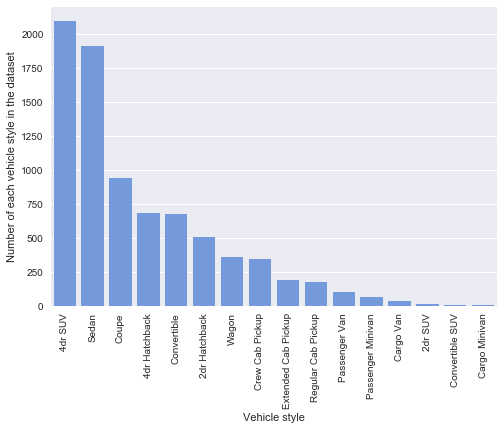

In [15]:
# draw a bar chart of the data to get an easier and quicker indication of this data
# choose a single color as the default of multiple colors will not be approriate here 
style_plot = sns.barplot(x="vehicle_style", y="model", data=sorted_style_count, color='cornflowerblue')

# set the x and y labels 
# becasue the x axis tick labes are so long, set the x axis tick labes to be at 90 degrees so that they are readable 
style_plot.set(xlabel='Vehicle style', ylabel = 'Number of each vehicle style in the dataset')
for item in style_plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

- 4dr SUVs and sedans are the most popular vehicle styles in the dataset 

### What years has the dataset been compiled from? 

In [16]:
# find out how many different years are in the dataset
# print out the number of unique entries are in the 'year' column 
print(car_raw_data.year.nunique())

28


In [17]:
# count how many models are in each year of the dataset 
# first, groupby 'year' and then use count() to count the models in each group 
# use 'as_index=False' argument so that the column containing the year reference will not become indexes
year_count = car_raw_data.groupby('year', as_index=False)['model'].count()

# print the new varaible, 'year_count' 
print(year_count)

    year  model
0   1990    123
1   1991    152
2   1992    177
3   1993    209
4   1994    163
5   1995    135
6   1996    131
7   1997    175
8   1998    154
9   1999    120
10  2000    118
11  2001    168
12  2002    205
13  2003    238
14  2004    235
15  2005    213
16  2006    205
17  2007    345
18  2008    349
19  2009    379
20  2010    298
21  2011    285
22  2012    387
23  2013    366
24  2014    589
25  2015   2170
26  2016   2157
27  2017   1668


- The database contains information on cars from the past 28 years 
- Analyze this data to see how the types of car have changed over time 

### How has the vehicle style altered over time? 

- Have a look at the precentage of cars in each year that are sedans and 4dr SUVs 

## Step 4 - select data for 2017 models only 

- For the purposes of choosing a car, filter the dataset to only inlcude cars from the past year 

In [18]:
# select data from 2017 cars only 
# use the loc function to pull out data where the year is equal to 2017
car_2017 = car_mod_data.loc[car_mod_data['year'] == 2017]

In [19]:
#have a look at the filtered data 
car_2017.head(n=10)

,make,model,year,engine_fuel_type,engine_HP,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,MSRP
32,FIAT,124 Spider,2017,premium unleaded (recommended),160.0,4.0,MANUAL,rear wheel drive,2.0,Performance,Compact,Convertible,35,26,819,27495
33,FIAT,124 Spider,2017,premium unleaded (recommended),160.0,4.0,MANUAL,rear wheel drive,2.0,Performance,Compact,Convertible,35,26,819,24995
34,FIAT,124 Spider,2017,premium unleaded (recommended),160.0,4.0,MANUAL,rear wheel drive,2.0,Performance,Compact,Convertible,35,26,819,28195
50,BMW,2 Series,2017,premium unleaded (recommended),335.0,6.0,AUTOMATIC,all wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,31,21,3916,46450
51,BMW,2 Series,2017,premium unleaded (recommended),335.0,6.0,AUTOMATIC,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Convertible,32,21,3916,49050
52,BMW,2 Series,2017,premium unleaded (recommended),335.0,6.0,AUTOMATIC,all wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Convertible,32,21,3916,51050
53,BMW,2 Series,2017,premium unleaded (recommended),335.0,6.0,AUTOMATIC,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,32,21,3916,44450
54,BMW,2 Series,2017,premium unleaded (recommended),248.0,4.0,AUTOMATIC,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,34,23,3916,38950
55,BMW,2 Series,2017,premium unleaded (recommended),248.0,4.0,AUTOMATIC,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,35,24,3916,33150
56,BMW,2 Series,2017,premium unleaded (recommended),248.0,4.0,AUTOMATIC,all wheel drive,2.0,"Luxury,Performance",Compact,Coupe,33,24,3916,35150


In [20]:
### sanity check - is the only entry in the year column 2017? 
print(car_2017.year.unique())

[2017]


- The sorting worked, continue to creating something that will aid in choosing a car 

## Step 5 - work on designing an aid to help choose a car 

### What are the searchable parameters? 

- In order to design a useful aid, it would be useful to know which of the data parameters are going to be useful to search

In [21]:
# pull out the unique entries in the 'vehicle_style' column 
print(car_2017.vehicle_style.unique())

['Convertible' 'Coupe' 'Sedan' '4dr Hatchback' 'Wagon' '2dr Hatchback'
 '4dr SUV' 'Extended Cab Pickup' 'Crew Cab Pickup' 'Regular Cab Pickup'
 'Passenger Minivan' '2dr SUV' 'Convertible SUV' 'Passenger Van']


In [22]:
# pull out the unique entries in the 'vehicle_size' column 
print(car_2017.vehicle_size.unique())

['Compact' 'Midsize' 'Large']


In [23]:
# pull out the unique entries in the 'market_category' column 
print(car_2017.market_category.unique())

['Performance' 'Factory Tuner,Luxury,High-Performance' 'Luxury,Performance'
 'Luxury' 'Flex Fuel,Performance' 'Flex Fuel'
 'Hatchback,Luxury,Performance' 'Hatchback,Luxury' 'Diesel,Luxury'
 'Luxury,High-Performance' 'High-Performance'
 'Factory Tuner,High-Performance' 'Hatchback' 'Hatchback,Performance'
 'Hatchback,Factory Tuner,Performance' 'Factory Tuner,Performance'
 'Crossover' 'Flex Fuel,Luxury' 'Hybrid'
 'Exotic,Factory Tuner,Luxury,High-Performance'
 'Crossover,Luxury,Performance' 'Crossover,Luxury'
 'Crossover,Luxury,High-Performance' 'Hatchback,Luxury,Hybrid'
 'Crossover,Performance' 'Crossover,Flex Fuel' 'Luxury,Hybrid'
 'Exotic,High-Performance' 'Crossover,Flex Fuel,Performance'
 'Hatchback,Factory Tuner,High-Performance' 'Hatchback,Flex Fuel'
 'Exotic,Luxury,High-Performance'
 'Crossover,Factory Tuner,Luxury,High-Performance'
 'Crossover,Factory Tuner,Luxury,Performance'
 'Crossover,Hatchback,Factory Tuner,Performance'
 'Crossover,Hatchback,Performance' 'Crossover,Hatchback

In [24]:
# pull out the unique entries in the 'transmission_type' column 
print(car_2017.transmission_type.unique())

['MANUAL' 'AUTOMATIC' 'AUTOMATED_MANUAL' 'DIRECT_DRIVE']


- The vehicle style, vehicle size and transmission type all look like good searchable parameters 
- The market category column will appears to have a lot of overlap and may not be useful as a searchable parameter in this case 

### Design a user input filtering system to choose a car 

- Personally, I am interested in either an SUV or Hatchback car 
- For this small pilot style study, limit the options to these cars 

#### Question 1 - what sort of car?

In [26]:
# ask the user what sort of car they are interested in
# use the input functionality to allow the user to do this themselves 
# save the answer as a variable that can then be used to filter the data 
question_1 = input("Which sort of car are you interested in? A 4dr SUV, 4dr Hatchback or 2dr Hatchback? ")

Which sort of car are you interested in? A 4dr SUV, 4dr Hatchback or 2dr Hatchback? 4dr Hatchback


In [27]:
print(question_1)

4dr Hatchback


In [28]:
# write a conditional statement that will tell the user what type of car they inputted and produce a
# a prompt to re-enter their answer if their answer is not a valid option 
if question_1 == '4dr SUV':
    print("Searching for 4dr SUV...")
elif question_1 == "4dr Hatchback":
    print("Searching for 4dr Hatchback...")
elif question_1 == "2dr hatchback":
    print("Searching for 2dr Hatchback...")
else: 
    print("Cannot find find what you are looking for, please try again")

Searching for 4dr Hatchback...


In [29]:
# now search the database for the inputted answer 
search_1 = car_2017.loc[car_2017['vehicle_style'] == question_1]
search_1.head(n=10)

,make,model,year,engine_fuel_type,engine_HP,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,MSRP
129,BMW,3 Series Gran Turismo,2017,premium unleaded (required),320.0,6.0,AUTOMATIC,all wheel drive,4.0,"Hatchback,Luxury,Performance",Midsize,4dr Hatchback,30,20,3916,49650
130,BMW,3 Series Gran Turismo,2017,premium unleaded (required),248.0,4.0,AUTOMATIC,all wheel drive,4.0,"Hatchback,Luxury",Midsize,4dr Hatchback,33,23,3916,43950
402,Mazda,3,2017,regular unleaded,155.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,37,28,586,20145
403,Mazda,3,2017,regular unleaded,184.0,4.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Performance",Compact,4dr Hatchback,35,26,586,24945
404,Mazda,3,2017,regular unleaded,184.0,4.0,MANUAL,front wheel drive,4.0,"Hatchback,Performance",Compact,4dr Hatchback,33,25,586,23895
405,Mazda,3,2017,regular unleaded,155.0,4.0,MANUAL,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,37,27,586,19095
406,Mazda,3,2017,regular unleaded,184.0,4.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Performance",Compact,4dr Hatchback,35,26,586,23445
408,Mazda,3,2017,regular unleaded,155.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,37,28,586,22245
409,Mazda,3,2017,regular unleaded,184.0,4.0,MANUAL,front wheel drive,4.0,"Hatchback,Performance",Compact,4dr Hatchback,33,25,586,22395
512,BMW,5 Series Gran Turismo,2017,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Hatchback,Luxury",Large,4dr Hatchback,26,18,3916,63200


In [30]:
### sanity check - make sure the data is getting smaller! 
print(search_1.shape)

(115, 16)


#### Question 2 - automatic or manual? 

In [31]:
# ask the user what transmission type they are interested in, AUTOMATIC or MANUAL? 
# use the input functionality to allow the user to do this themselves 
# save the answer as the variable 'question_2' that can then be used to filter the data 
question_2 = input("Would you like an AUTOMATIC or MANUAL transmission?")

Would you like an AUTOMATIC or MANUAL transmission?AUTOMATIC


In [32]:
print(question_2)

AUTOMATIC


In [33]:
# write a conditional statement that will tell the user what type of transmission is being searched for
# include a prompt to request the user to re-enter their answer if their answer is not a valid option 
if question_2 == 'AUTOMATIC':
    print("Searching for cars with automatic transmission...")
elif question_2 == "MANUAL":
    print("Searching for cars with manual transmission...")
else: 
    print("Cannot find find what you are looking for, please try again")

Searching for cars with automatic transmission...


In [34]:
# now search the database for the inputted answer 
search_2 = search_1.loc[search_1['transmission_type'] == question_2]
search_2.head(n=10)

,make,model,year,engine_fuel_type,engine_HP,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,MSRP
129,BMW,3 Series Gran Turismo,2017,premium unleaded (required),320.0,6.0,AUTOMATIC,all wheel drive,4.0,"Hatchback,Luxury,Performance",Midsize,4dr Hatchback,30,20,3916,49650
130,BMW,3 Series Gran Turismo,2017,premium unleaded (required),248.0,4.0,AUTOMATIC,all wheel drive,4.0,"Hatchback,Luxury",Midsize,4dr Hatchback,33,23,3916,43950
402,Mazda,3,2017,regular unleaded,155.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,37,28,586,20145
403,Mazda,3,2017,regular unleaded,184.0,4.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Performance",Compact,4dr Hatchback,35,26,586,24945
406,Mazda,3,2017,regular unleaded,184.0,4.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Performance",Compact,4dr Hatchback,35,26,586,23445
408,Mazda,3,2017,regular unleaded,155.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,37,28,586,22245
512,BMW,5 Series Gran Turismo,2017,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Hatchback,Luxury",Large,4dr Hatchback,26,18,3916,63200
513,BMW,5 Series Gran Turismo,2017,premium unleaded (required),300.0,6.0,AUTOMATIC,rear wheel drive,4.0,"Hatchback,Luxury,Performance",Large,4dr Hatchback,27,19,3916,60900
514,BMW,5 Series Gran Turismo,2017,premium unleaded (required),445.0,8.0,AUTOMATIC,all wheel drive,4.0,"Hatchback,Luxury,Performance",Large,4dr Hatchback,24,15,3916,72500
2588,Honda,Civic,2017,regular unleaded,174.0,4.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Performance",Compact,4dr Hatchback,40,31,2202,25300


In [35]:
### sanity check - is the data getting smaller?!
print(search_2.shape)

(65, 16)


#### Question 3 - what size car? 

In [36]:
# ask the user what size car they are interested in, compact, midsize or large 
# use the input functionality to allow the user to do this themselves 
# save the answer as the variable 'question_3' that can then be used to filter the data 
question_3 = input("What size car would you like, Compact, Midsize or Large?")

What size car would you like, Compact, Midsize or Large?Compact


In [37]:
print(question_3)

Compact


In [38]:
# write a conditional statement that will tell the user what size car is being searched for
# include a prompt to request the user to re-enter their answer if their answer is not a valid option 
if question_3 == 'Compact':
    print("Searching for Compact cars...")
elif question_3 == "Midsize":
    print("Searching for Midsize cars...")
elif question_3 == "2dr hatchback":
    print("Searching for Large cars...")
else: 
    print("Cannot find find what you are looking for, please try again")

Searching for Compact cars...


In [39]:
# now search the database for the inputted answer 
search_3 = search_2.loc[search_2['vehicle_size'] == question_3]
search_3.head(n=10)

,make,model,year,engine_fuel_type,engine_HP,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,MSRP
402,Mazda,3,2017,regular unleaded,155.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,37,28,586,20145
403,Mazda,3,2017,regular unleaded,184.0,4.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Performance",Compact,4dr Hatchback,35,26,586,24945
406,Mazda,3,2017,regular unleaded,184.0,4.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Performance",Compact,4dr Hatchback,35,26,586,23445
408,Mazda,3,2017,regular unleaded,155.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,37,28,586,22245
2588,Honda,Civic,2017,regular unleaded,174.0,4.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Performance",Compact,4dr Hatchback,40,31,2202,25300
2589,Honda,Civic,2017,regular unleaded,174.0,4.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Performance",Compact,4dr Hatchback,40,31,2202,22800
2590,Honda,Civic,2017,regular unleaded,174.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,40,31,2202,20500
2591,Honda,Civic,2017,premium unleaded (recommended),180.0,4.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Performance",Compact,4dr Hatchback,36,30,2202,22100
2923,Toyota,Corolla iM,2017,regular unleaded,137.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,36,28,2031,19490
3164,Chevrolet,Cruze,2017,regular unleaded,153.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,38,29,1385,21920


In [40]:
### sanity check - is the data getting smaller?! 
print(search_3.shape)

(60, 16)


#### Question 4 - how much do you want to spend? 

In [41]:
question_4 = input ("How much do you want to spend? <20000 or >20000? ")

How much do you want to spend? <20000 or >20000? >20000


In [42]:
print(question_4)

>20000


In [43]:
# write a conditional statement that will tell the user what price of car is being searched for
# include a prompt to request the user to re-enter their answer if their answer is not a valid option 
if question_4 == '<20000':
    print("Searching for cars that cost less than 20,000 dollars...")
elif question_4 == ">20000":
    print("Searching for cars that cost more than 20,000 dollars...")
else: 
    print("Cannot find find what you are looking for, please try again")

Searching for cars that cost more than 20,000 dollars...


In [44]:
# the answer to question 4 is a string, it needs to be a integer to perform the filtering step
# first remove the first character
question_4a = question_4[1:]

# now create a new variable, question_4b, that contains question 4a as an integer 
question_4b = int(question_4a)

In [45]:
### sanity check - what data type is 'question_4b'? 
type(question_4b)

int

In [46]:
# now search the database for the inputted answer 
search_4 = search_3.loc[search_3['MSRP'] > question_4b]
search_4.head(n=10)

,make,model,year,engine_fuel_type,engine_HP,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,MSRP
402,Mazda,3,2017,regular unleaded,155.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,37,28,586,20145
403,Mazda,3,2017,regular unleaded,184.0,4.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Performance",Compact,4dr Hatchback,35,26,586,24945
406,Mazda,3,2017,regular unleaded,184.0,4.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Performance",Compact,4dr Hatchback,35,26,586,23445
408,Mazda,3,2017,regular unleaded,155.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,37,28,586,22245
2588,Honda,Civic,2017,regular unleaded,174.0,4.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Performance",Compact,4dr Hatchback,40,31,2202,25300
2589,Honda,Civic,2017,regular unleaded,174.0,4.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Performance",Compact,4dr Hatchback,40,31,2202,22800
2590,Honda,Civic,2017,regular unleaded,174.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,40,31,2202,20500
2591,Honda,Civic,2017,premium unleaded (recommended),180.0,4.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Performance",Compact,4dr Hatchback,36,30,2202,22100
3164,Chevrolet,Cruze,2017,regular unleaded,153.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,38,29,1385,21920
3172,Chevrolet,Cruze,2017,regular unleaded,153.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,37,28,1385,23945


In [47]:
### sanity check - is the data getting smaller? 
print(search_4.shape)

(38, 16)


In [48]:
# the data contains numberous entries for each model which represent choices that could be made re: car options
# such as whether you have the base version of a model or a more luxurious version of a model
# to pull out an overview, groupby model, calcualate the average price and output this 

grouped_price = search_4.groupby('model', as_index=False)['MSRP'].mean()
sorted_grouped_price = grouped_price.sort_values(by=['MSRP'], ascending=[False])
print(sorted_grouped_price)

          model          MSRP
1       CT 200h  31250.000000
10  Prius Prime  29666.666667
9         Prius  27308.333333
8          Juke  24841.250000
7       Impreza  23195.000000
3         Cruze  22932.500000
0             3  22695.000000
2         Civic  22675.000000
5         Forte  21990.000000
6          Golf  21845.000000
12        Sonic  21215.000000
11          Rio  20905.000000
4           Fit  20765.000000
